## Author: Amelia Xie

Date(s): 10/10/22

10/10/22

# Research background and aim
We will look at the dataset corresponding to participant 4 with the goal of analysing the step counts of participants in a week.

Let's load in the data

In [1]:
import pandas as pd
url = "../../../datasets/Participant-08.csv"
p8 = pd.read_csv(url)

Let's have a look at the dataset

In [2]:
p8.head(10)

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
5,01-Jan-2022 05:00,01-Jan-2022 06:00,36.0
6,01-Jan-2022 06:00,01-Jan-2022 07:00,0.0
7,01-Jan-2022 07:00,01-Jan-2022 08:00,0.0
8,01-Jan-2022 08:00,01-Jan-2022 09:00,0.0
9,01-Jan-2022 09:00,01-Jan-2022 10:00,384.0


In [3]:
p8.describe()

,Steps (count)
count,6105.000000
mean,361.618018
std,739.659887
min,0.000000
25%,0.000000
50%,46.000000
75%,338.000000
max,6379.000000


Participant 4 walks an average of 362 steps per hour, and appears to hardly walk at all half the time. The upper quartile is lower than the mean, meaning they must have some instances with extremely high step counts that made up for their lack of physical activity.

I should check if there are any values that require data engineering.

In [4]:
p8.isna().any()

Start            False
Finish           False
Steps (count)    False
dtype: bool

There does not appear to be any missing or invalid values in the data. 

Since I am analysing trends across a week, it would make sense to convert the dates into week format. I will create a new column for the days of the week and group them together.

In [5]:
p8['Start'] = pd.to_datetime(p8['Start'])
p8['Day of week'] = p8['Start'].dt.day_name()

p8["Steps (count)"] = round(p8["Steps (count)"])
p8["Steps (count)"] = p8["Steps (count)"].astype(int)
#convert step counts to whole numbers
week_count = p8.groupby(['Day of week'])['Steps (count)'].sum()
week_count 

Day of week
Friday       290026
Monday       308070
Saturday     356280
Sunday       315007
Thursday     305077
Tuesday      296067
Wednesday    337149
Name: Steps (count), dtype: int32

It appears that this participant is most active on Saturdays and the least active on Fridays, although the step counts for other days seem to be inconsistent. We should plot the data to better identify the trends within each day.

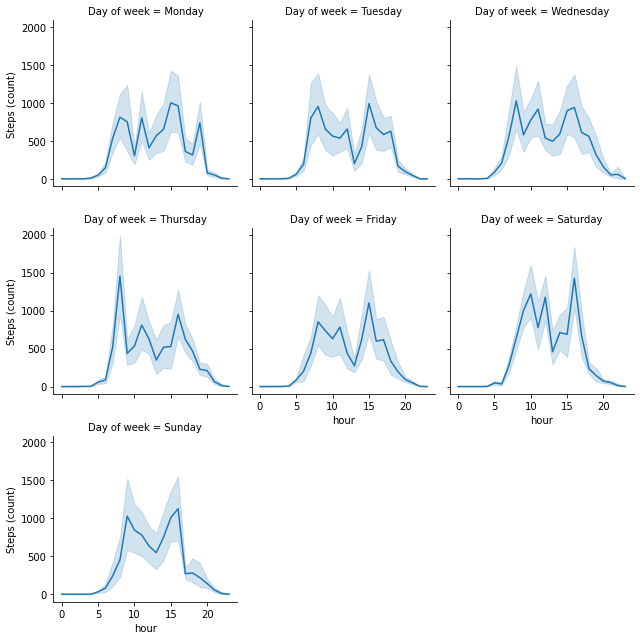

In [6]:
import seaborn as sns
p8['hour'] = p8['Start'].dt.hour
p8['date'] = p8['Start'].dt.date

dest = '../../../datasets/Modified_dataset08.csv'
p8.to_csv(dest) #saving a csv to do future analyses on

plot = sns.FacetGrid(p8, col ='Day of week',                     
col_order = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
], col_wrap = 3)
plot.map_dataframe(sns.lineplot, "hour", "Steps (count)")

There do not appear to be any obvious trends in the data. While some days have two instances of high step count data, others have three peaks, and these patterns do not seem to be adhered to closely. Most times, the peaks seem to end at 1000 steps, so perhaps this participant was not motivated to exercise. 